In [1]:
# Enable the colab extension that renders pandas dataframes into interactive displays
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
print(pd.__version__)

1.5.3


In [3]:
import os
pwd = os.getcwd()  # Show current working directory

# Data Pre-Processing

### Convert .csv file to pands.DataFrame

In [4]:
df_book = pd.read_csv(pwd + "//sample_data//books.csv", sep=",", encoding="utf-8", on_bad_lines="warn", index_col="bookID")
# Modify the path when the notebook is run in your own Google Colab account or on a local computer

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



The attribute (column) "bookID" is used as the row index (row name).
Here it can be seen that 4 "bad lines" has been skipped when converting the .csv file to pandas.DataFrame. Because these lines have 13 attributes while normal lines have 12 attributes, so it is reasonable to remove these 4 bad records. We checked each of these lines and found that all errors are caused by author names containing a comma. Therefore, we used double quote to surround these author name so that `pandas.read_csv()` doesn't identify comma in author name as a delimiter.

In [5]:
badline = [3350, 4704, 5879, 8981]
df_book = pd.read_csv(pwd + "//sample_data//books_corrected.csv", sep=",", encoding="utf-8", on_bad_lines="warn", index_col="bookID", quotechar='"')
df_book.iloc[[x-2 for x in badline]]    # Show corrected "bad lines"

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
12224,Streetcar Suburbs: The Process of Growth in Bo...,"Sam Bass Warner, Jr./Sam B. Warner",3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press
16914,The Tolkien Fan's Medieval Reader,David E. Smith/Verlyn Flieger,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press
22128,Patriots (The Coming Collapse),"James Wesley, Rawles",3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers
34889,Brown's Star Atlas: Showing All The Bright Sta...,"Brown, Son & Ferguson",0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.


### Preview of the dataset (first 10 lines)

In [6]:
df_book.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


In [7]:
df_book.publication_date[1]   # Show data format in column "publication_date"

'9/16/2006'

In the column `language_code`, `eng` and `en-US` both refer to English. This is a format inconsistency. It should be checked to see if there are more kinds of inconsistency.
The values in column `publication_date` are processed as type `str`. The date should be converted to pandas `datetime` object by convention.

### Check missing values `NaN` in pandas.DataFame

In [8]:
df_book.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Conclusion: There is no missing value in `df_book`

### Check duplicated data

In [9]:
df_book.duplicated(subset="isbn13").sum()   # Count duplicated records in dataset

0

The ISBN/ISBN13 is the unique ID of a book in the world, so it can be used to examine if there are duplicated books in the dataset.
The results show that there is no duplicated record.

### Overview of dataset

In [10]:
df_book.info()      # List all the column names and their data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  int64  
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.3+ MB


Here it can be seen that each book in the dataset has 11 attributes, and there are 11127 book records in total. In other word, the dimension of the dataset is $11127\times 11$.
Additionally, the column name `  num_pages` contains 2 space characters at the beginning, which should be removed in data cleaning. Because it will cause problems when doing indexing like `df_book.num_pages`

In [11]:
df_book.describe()  # statistique information of the columns that contain numeric values

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


The minimal value in column `num_pages` is 0, which means there are books that have 0 page, and this is abnormal. These data should be corrected in data cleaning process.

In [12]:
df_book[df_book["  num_pages"]==0]   # Print all the books that have 0 page

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio


In the table above we can see there are 76 books that have 0 page.
In addition, we can notice that there are authors named `NOT A BOOK`, which need further examination.

In [13]:
df_book.loc[df_book.authors=="NOT A BOOK", :]   # Print all the books whose author is "NOT A BOOK"
# df_book[df_book.authors=='NOT A BOOK']  is also valid

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


So, there are 5 books whose author names are marked as `NOT A BOOK`. If searching these 5 items' name on Google, it is easy to realize that all of them are CDs, not books. Therefore, these 5 records should be removed from the dataset.
In table above, one can see that there are books whos `rating_counts` is 0. So it is interesting to see how many books are in this situation.

In [14]:
# List all the books who have 0 rating.
df_book.loc[df_book['ratings_count']==0, ['ratings_count', 'text_reviews_count', 'average_rating']]

,ratings_count,text_reviews_count,average_rating
bookID,,,
797,0,0,4.03
799,0,0,0.00
1302,0,0,0.00
1658,0,0,2.83
1664,0,0,3.50
...,...,...,...
42863,0,0,3.44
44321,0,0,3.58
44433,0,0,3.50


In the table above it can be seen that both `ratings_count` and `text_reviews_count` are 0 for these books. Logically `ratings_count`= 0 must lead to `average_rating`=0. So we need to drop all the records where `ratings_count`= 0 and `average_rating`$\neq$0, because they are mis-leading for machine learning model.

### Conclusion of first glance at dataset
1. The dimension of the dataset is $11127 \times 11$. There is no duplicated data and missing values in it.
2. The column name `num_pages` contains 2 space characters at the beginning, which should be corrected.
3. There are 76 books who have 0 page, which are abnormal and need further processing.
4. There is a format inconsistency in column `language_code`, which should be checked and corrected in further processing.
5. The values in column `publication_date` are processed as type `str`. The date should be converted to pandas `datetime` object by convention.
6. Each book may have more than one auther in column `authors`, where the delimiter is `/`.
7. The records whose author is `NOT A BOOK` are actually CDs, which should be removed from the dataset
8. There are misrecorded books that have `ratings_count`= 0 and `average_rating`$\neq$0. They all have to be dropped.

# Data cleaning
### Remove spaces in column name

In [15]:
df_book = df_book.rename(str.strip, axis='columns')   # Strip all spaces on the right or left of a column name
# df_book.columns = df_book.columns.str.strip()   This an alternative way to do it
df_book.columns    # Check column name. Column name should contain no space

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

### Correct format inconsistency in column `language_code`

In [16]:
df_book.language_code.unique()  # list all the language codes in the column

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

There are 27 different language codes in this column, but it can be noticed that codes `eng`, `en-US`, `en-GB`, `en-CA`, and `enm` all refer to English.
In particular, `enm` refers to Middle English (c. 1100 - c. 1500), which has a big difference with modern English. Other codes that start with `en` stand for modern English, among which there is slight difference.
Therefore, we can assume that readers don't care much about the book is written by which kind of modern English, hence it is reasonable to replace all modern English code by `eng`。

In [17]:
df_book.language_code = df_book.language_code.replace(['en-US','en-GB','en-CA'], 'eng')   # Replace 'en-US', 'en-GB', 'en-CA' by 'eng'

### Correct data format in column `publication_date`

In [18]:
# pandas.to_datetime() function convert date/time string to a standard datetime object of pandas
# Specify the original date format: month/day/year
# errors='coerce' means when there is a converting error, the original value is marked as a non-value ('NaT')
col_publication_date = pd.to_datetime(df_book.publication_date, format='%m/%d/%Y',errors='coerce')
# Visualize converting result
col_publication_date.head()

bookID
1   2006-09-16
2   2004-09-01
4   2003-11-01
5   2004-05-01
8   2004-09-13
Name: publication_date, dtype: datetime64[ns]

In [19]:
# Check if there is values that are failed to convert (Check existence of 'NaT' in column).
col_publication_date[col_publication_date.isnull()]

bookID
31373   NaT
45531   NaT
Name: publication_date, dtype: datetime64[ns]

In [20]:
# Check the date value before converting where error happened
print(df_book.loc[31373, 'publication_date'])
print(df_book.loc[45531, 'publication_date'])

11/31/2000
6/31/1982


So it can be remarked that error happens because both June and November have only 30 days instead of 31.

In [21]:
# Correct the error found above
col_publication_date.loc[31373] = pd.to_datetime("11/30/2000", format="%m/%d/%Y")
col_publication_date.loc[45531] = pd.to_datetime("6/30/1982", format="%m/%d/%Y")
# Check again
col_publication_date[[31373, 45531]]

bookID
31373   2000-11-30
45531   1982-06-30
Name: publication_date, dtype: datetime64[ns]

In [22]:
# Replace the original column in DataFrame by converted column
df_book['publication_date'] = col_publication_date

### Drop CDs in the dataset
The records with `NOT A BOOK` as author are actually CDs, so it is logical to drop them.

In [23]:
# Acquire bookID of rows containing 'NOT A BOOK' as author
ID_to_Drop = df_book[df_book.authors=="NOT A BOOK"].index
ID_to_Drop

Int64Index([3593, 3599, 19786, 19787, 19788], dtype='int64', name='bookID')

In [24]:
# Drop CDs
df_book.drop(index=ID_to_Drop, inplace=True)

### Correct books with 0 page

In [25]:
# Replace 0s in col. num_pages with the average page of all non-zero page books
df_book.loc[df_book["num_pages"]==0, 'num_pages'] = round(df_book.loc[df_book["num_pages"]!=0, "num_pages"].mean())

### Drop all the book that have `ratings_count`= 0 AND `average_rating`$\neq$0

In [26]:
ID_to_Drop = df_book.loc[(df_book['ratings_count']==0) & (df_book['average_rating']!=0), :].index
df_book.drop(inplace=True, index=ID_to_Drop)

# Data Explore and Analysis

<ipython-input-27-eca0339f1f15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_book.corr(), annot=True)


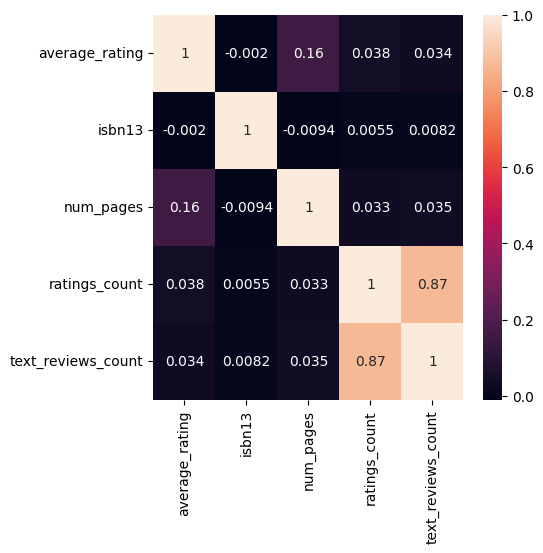

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(df_book.corr(), annot=True)
plt.show()

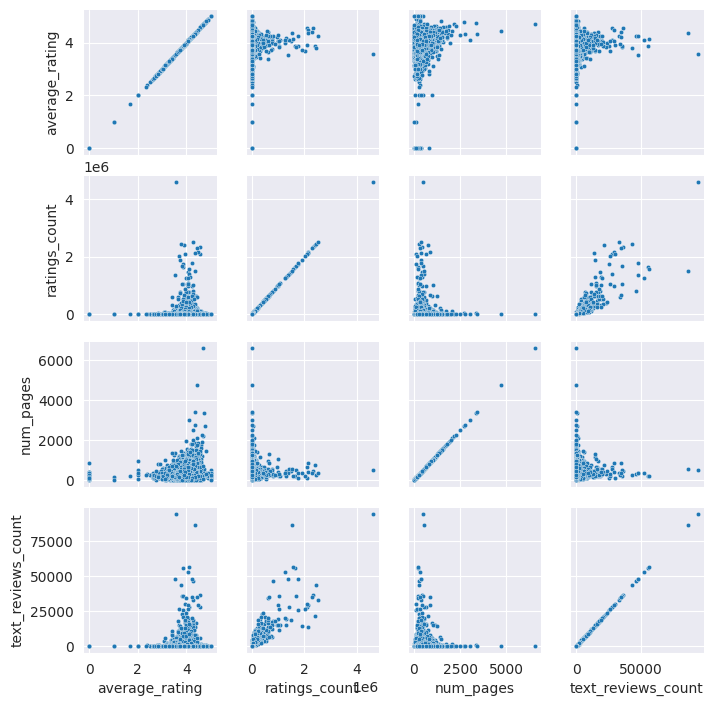

In [28]:
sns.set_style("darkgrid")
numerical_plot = sns.PairGrid(df_book, vars=['average_rating', 'ratings_count', 'num_pages','text_reviews_count'], height = 1.8)
numerical_plot.map(sns.scatterplot,  s=10, edgecolor="white")

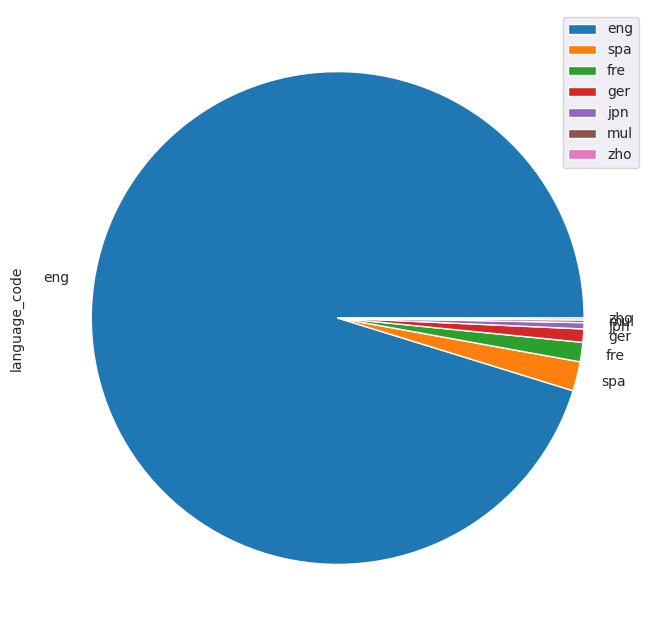

In [29]:
df_book['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(8, 8)).legend()

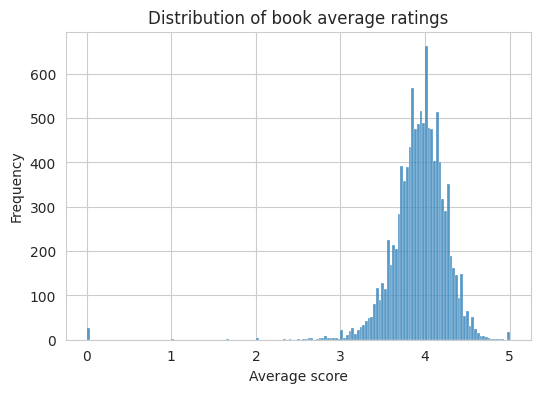

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(df_book['average_rating'])
plt.xlabel('Average score')
plt.ylabel('Frequency')
plt.title('Distribution of book average ratings')
plt.show()

# Feature Engineering

## Drop column `title`, `isbn`

`isbn13` is a column in type `int64` and is used as unique identifier for each book in addtion to row index in further processing.

In [31]:
df_book.drop(inplace=True, columns=['title', 'isbn'])

## Convert publish date to book's age since its publication

In [32]:
 # Add a new column 'today_date' contains only the time stamp of tody
df_book['today_date'] = pd.Timestamp('2023-08-04')
# Calclate the age of each book in  decimal value of year since its publication
df_book['delta_date'] = (df_book["today_date"] - df_book["publication_date"]).dt.days / 365.0
# Drop the column 'today_date' and original 'publication_date'
df_book.drop(columns=['today_date', 'publication_date'], inplace=True)

count    11068.000000
mean        22.937875
std          8.227293
min          3.345205
25%         17.852055
50%         20.441096
75%         25.026027
max        123.671233
Name: delta_date, dtype: float64

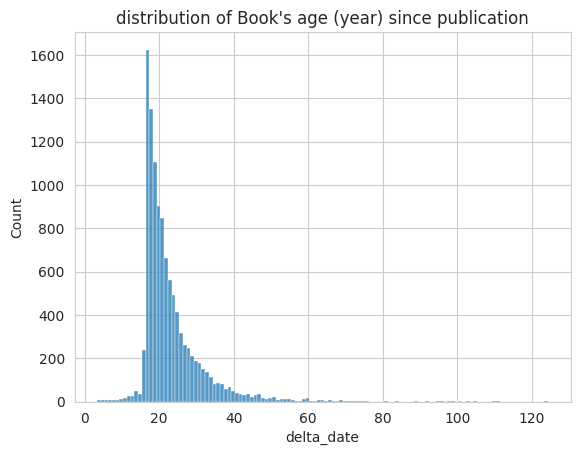

In [33]:
# Show distribution of book's age
sns.set_style("whitegrid")
sns.histplot(data=df_book, x='delta_date', binwidth=1).set(title="distribution of Book's age (year) since publication")
df_book['delta_date'].describe()

## Frequency encoding for column `language_code`

In [34]:
df_book["language_code_encoded"] = df_book.groupby("language_code")["language_code"].transform("count") / len(df_book.index)

In [35]:
# Drop original "language_code" column
df_book.drop(inplace=True, columns=['language_code'])

## Target encoding for column `publisher`

The follwing target encoding and the indispensable smoothing technique takes reference to the tutorial on *Kaggle*:

[Target Encoding:
Boost any categorical feature with this powerful technique.](https://www.kaggle.com/code/ryanholbrook/target-encoding)

In [36]:
# Count number of unique pubulisher
N_publisher = df_book['publisher'].nunique()
print("Number of UNIQUE publisher: {}".format(N_publisher))

Number of UNIQUE publisher: 2271


In [37]:
# Create a new column by calculating the average rating for each publisher
df_book["publisher_avg_rating"] = df_book.groupby("publisher")["average_rating"].transform("mean")
# Create a new column by counting the occurrance times of each publisher
df_book["publisher_count"] = df_book.groupby("publisher")["publisher"].transform("count")
# The parameter m determines the "smoothing factor". Larger values of m put more weight on the overall estimate.
m_factor = 2.0
# Calculate the overall mean of column "average_rating"
mean_overall = df_book["average_rating"].mean()
# Determine weight for each publisher
df_book["publisher_weight"] = df_book["publisher_count"] / (m_factor + df_book["publisher_count"])
# Blend the in-category average with the overall average with weight
df_book["publisher_encoded"] = df_book["publisher_weight"] * df_book["publisher_avg_rating"] + (1-df_book["publisher_weight"]) * mean_overall
# Drop the original column "publisher" and columns that contain intermediate results
df_book.drop(inplace=True, columns=['publisher', 'publisher_avg_rating', 'publisher_count', 'publisher_weight'])
df_book["publisher_encoded"].head(10)

bookID
1     4.043388
2     4.043388
4     3.973355
5     4.043388
8     3.973355
9     3.869143
10    3.973355
12    4.172495
13    3.915641
14    3.871937
Name: publisher_encoded, dtype: float64

## Encoding for column `authors` (modified target encoding)

We take reference to the blog article: [Dealing with List Values in Pandas Dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)
to get some techniques that enable us to convert each row in column `authors` from string to a list of authors

In [38]:
print(df_book['authors'].loc[1])
print(type(df_book['authors'].loc[1]))

J.K. Rowling/Mary GrandPré
<class 'str'>


From the output above we can see that in column `authors`, each row contains a string and the authors are seperated by delimiter `/`. Since each book can have more than one author, it is convinent to convert the `str` to a `list` of authors for later processing.

In [39]:
df_book['authors'] = df_book['authors'].apply(lambda x : re.sub(' +', ' ', x.strip()).split('/'))
df_book['authors'].head(10)

bookID
1     [J.K. Rowling, Mary GrandPré]
2     [J.K. Rowling, Mary GrandPré]
4                    [J.K. Rowling]
5     [J.K. Rowling, Mary GrandPré]
8     [J.K. Rowling, Mary GrandPré]
9          [W. Frederick Zimmerman]
10                   [J.K. Rowling]
12                  [Douglas Adams]
13                  [Douglas Adams]
14                  [Douglas Adams]
Name: authors, dtype: object

In [40]:
df_tmp_authors = df_book[['isbn13', 'authors', 'average_rating', 'ratings_count']]
df_tmp_authors = df_tmp_authors.explode('authors')

In [41]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11068 entries, 1 to 45641
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   authors                11068 non-null  object 
 1   average_rating         11068 non-null  float64
 2   isbn13                 11068 non-null  int64  
 3   num_pages              11068 non-null  int64  
 4   ratings_count          11068 non-null  int64  
 5   text_reviews_count     11068 non-null  int64  
 6   delta_date             11068 non-null  float64
 7   language_code_encoded  11068 non-null  float64
 8   publisher_encoded      11068 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.1+ MB


In [42]:
# Use "ratings_count" as weight for "average_rating"
df_tmp_authors['weighted_rating'] = df_tmp_authors['average_rating'] * df_tmp_authors['ratings_count']
# Compute the total number of ratings of a single author
df_tmp_authors['authors_ratings_count'] = df_tmp_authors.groupby('authors')['ratings_count'].transform('sum')
df_tmp_authors['tmp'] = df_tmp_authors['weighted_rating'] / df_tmp_authors['authors_ratings_count']
df_tmp_authors['authors_avg_rating'] = df_tmp_authors.groupby('authors')['tmp'].transform('sum')

In [43]:
df_tmp_authors_final = df_tmp_authors.groupby('isbn13').agg({'authors_avg_rating': 'mean'}).reset_index()
df_book_final = pd.merge(df_book, df_tmp_authors_final, on='isbn13', how='left')

In [44]:
# Drop original column "isbn13" and "authors"
df_book_final.drop(inplace=True, columns=['isbn13', 'authors'])

In [45]:
df_book_final.info()    # DataFrame after feature engineering

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11068 entries, 0 to 11067
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_rating         11068 non-null  float64
 1   num_pages              11068 non-null  int64  
 2   ratings_count          11068 non-null  int64  
 3   text_reviews_count     11068 non-null  int64  
 4   delta_date             11068 non-null  float64
 5   language_code_encoded  11068 non-null  float64
 6   publisher_encoded      11068 non-null  float64
 7   authors_avg_rating     11068 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 778.2 KB


# **Model training preparation : Classes combination and Split the data**

Classes combination for average rating :

    Group 1 : Rating 0 + Rating 1 + Rating 2 + Rating 3
    Group 2 : Rating 4
    Group 3 : Rating 5


  We need a balanced number of examples for each class to avoid bias and achieve better prediction performance. So we group several rating values into groups.

In [46]:
df_book_final['average_rating'] = df_book_final['average_rating'].round().astype(int)
df_book_final.average_rating.value_counts()

4    10159
3      689
5      183
0       26
2        9
1        2
Name: average_rating, dtype: int64

In [47]:
df_book_final.average_rating.unique()

array([5, 4, 3, 0, 1, 2])

In [48]:
df_book_final.loc[df_book_final['average_rating'] <= 3, 'average_rating'] = 3

In [49]:
df_book_final.average_rating.unique()

array([5, 4, 3])

In [50]:
df_book_final['average_rating'] = df_book_final['average_rating'].round().astype(int)
df_book_final.average_rating.value_counts()

4    10159
3      726
5      183
Name: average_rating, dtype: int64

In [51]:
df_book_final.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'delta_date', 'language_code_encoded', 'publisher_encoded',
       'authors_avg_rating'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df_train, df_test = train_test_split(df_book_final, test_size=0.2, stratify=df_book_final.average_rating)

In [54]:
len(df_book_final)  # Book records in total after data cleaning and feature engineering

11068

In [55]:
len(df_train)       # Size of training set

8854

In [56]:
len(df_test)        # Size of test set

2214

## **Check some values after the split**

We see that the training and testing set still represent the reality of our data frame

In [57]:
print(df_book_final.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.950939645825804
3.950869663428959
3.951219512195122


In [58]:
print(df_book_final.num_pages.mean())
print(df_train.num_pages.mean())
print(df_test.num_pages.mean())

338.8450487893025
337.86469392365035
342.76558265582656


## **Check the columns**

We verify that we  have the same columns that we had in our original data frame

In [59]:
df_train.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'delta_date', 'language_code_encoded', 'publisher_encoded',
       'authors_avg_rating'],
      dtype='object')

In [60]:
# get the values of the columns for the training data
X_train = df_train.loc[:, ['authors_avg_rating', 'language_code_encoded', 'num_pages', 'ratings_count', 'text_reviews_count', 'delta_date', 'publisher_encoded']].values
y_train = df_train.average_rating.values


In [61]:
# get the values of the columns for the test data
X_test = df_test.loc[:,['authors_avg_rating', 'language_code_encoded', 'num_pages', 'ratings_count', 'text_reviews_count', 'delta_date', 'publisher_encoded']].values
y_test = df_test.average_rating.values

# **Smote and oversampling**


In [62]:
unique, count = np.unique(y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{3: 581, 4: 8127, 5: 146}

In [63]:
from imblearn.over_sampling import SMOTE


sampling_strategy = {
    3: 7000,  # Desired ratio for group average_rating=3
    4: 8163,  # Desired ratio for group average_rating=4
    5: 7000   # Desired ratio for group average_rating=5
}

sm = SMOTE(random_state=12, sampling_strategy=sampling_strategy)
x_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (8163) in class 4 will be larger than the number of samples in the majority class (class #4 -> 8127)
  warnings.warn(


In [64]:
unique, count = np.unique(y_train_smote, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{3: 7000, 4: 8163, 5: 7000}

# **Modelling part and Model evaluation**

## **Linear model : logistic regression**

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
# Model initialization
lr_model = LogisticRegression(random_state=0,max_iter=1000)

In [67]:
# We train the model on the training data
lr_model.fit(X=X_train, y=y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Model evaluation


Creation of a Y test predicted variable, a list of the predictions that our model is going to make.

In [68]:
y_test_predicted_lr = lr_model.predict(X_test)

In [69]:
#Configuration to display all array values
np.set_printoptions(threshold=np.inf)


In [70]:
#Accuracy of the model : we compare one by one to count how many the model has gotten correctly
np.set_printoptions(threshold=np.inf)

In [71]:
(y_test_predicted_lr == y_test).sum()/len(y_test)

0.9173441734417345

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_test,y_test_predicted_lr))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       145
           4       0.92      1.00      0.96      2032
           5       0.00      0.00      0.00        37

    accuracy                           0.92      2214
   macro avg       0.31      0.33      0.32      2214
weighted avg       0.84      0.92      0.88      2214



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using SMOTE for the oversampling

In [74]:
lr_model_smote = LogisticRegression().fit(x_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
y_test_pred_lr_smote = lr_model_smote.predict(X_test)

In [76]:
print(classification_report(y_test,y_test_pred_lr_smote))

              precision    recall  f1-score   support

           3       0.08      0.21      0.12       145
           4       0.92      0.63      0.75      2032
           5       0.03      0.38      0.06        37

    accuracy                           0.60      2214
   macro avg       0.34      0.41      0.31      2214
weighted avg       0.85      0.60      0.69      2214



## **Non Linear model :  Random Forest**

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
# initialize Random Forest classifier
rf_model = RandomForestClassifier()

In [79]:
# train classifier
rf_model.fit(X_train,y_train)

RandomForestClassifier()

### Model evaluation


In [80]:
# predict on test data
Y_pred_rf = rf_model.predict(X_test)

In [81]:
print(classification_report(y_test,Y_pred_rf))

              precision    recall  f1-score   support

           3       0.83      0.48      0.61       145
           4       0.95      0.99      0.97      2032
           5       0.77      0.46      0.58        37

    accuracy                           0.95      2214
   macro avg       0.85      0.64      0.72      2214
weighted avg       0.94      0.95      0.94      2214



### Using SMOTE for the oversampling

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
# initialize Random Forest classifier
rf_model_smote = RandomForestClassifier()

In [84]:
# train classifier
rf_model_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [85]:
y_test_pred_rf_smote = rf_model_smote.predict(X_test)

In [86]:
print(classification_report(y_test,y_test_pred_rf_smote))

              precision    recall  f1-score   support

           3       0.44      0.66      0.52       145
           4       0.97      0.92      0.94      2032
           5       0.39      0.70      0.50        37

    accuracy                           0.90      2214
   macro avg       0.60      0.76      0.66      2214
weighted avg       0.92      0.90      0.91      2214



## **Non Linear model :  MLP  (Multi-Layer Perceptron classifier)**

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
# try a new classifier: Multi-Layer Perceptron classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000)


# In our first layer we have 20 neurons (20 nodes) and in the second one we have 10 nodes. I chose this randomly. You can change them and try different configurations
#The Max iteration  means how many times I want my neural network to run : 1000 times because I don't want to kill my PC

In [89]:
mlp_model.fit(X=X_train,y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)

### Model evaluation


In [90]:
y_test_predicted_mlp = mlp_model.predict(X_test)

In [91]:
print(classification_report(y_test,y_test_predicted_mlp))

              precision    recall  f1-score   support

           3       1.00      0.01      0.01       145
           4       0.92      1.00      0.96      2032
           5       0.00      0.00      0.00        37

    accuracy                           0.92      2214
   macro avg       0.64      0.34      0.32      2214
weighted avg       0.91      0.92      0.88      2214



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using SMOTE for the oversampling

In [92]:
from sklearn.neural_network import MLPClassifier

In [93]:
mlp_model_smote = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000)

In [94]:
mlp_model_smote.fit(X=x_train_smote,y=y_train_smote)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)

In [95]:
y_test_pred_mlp_smote = mlp_model_smote.predict(X_test)

In [96]:
print(classification_report(y_test,y_test_pred_mlp_smote))

              precision    recall  f1-score   support

           3       0.26      0.46      0.33       145
           4       0.95      0.76      0.84      2032
           5       0.07      0.65      0.13        37

    accuracy                           0.73      2214
   macro avg       0.43      0.62      0.43      2214
weighted avg       0.89      0.73      0.80      2214

